## Import and fe

In [59]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../../dataset/KAG_energydata_complete.csv')


In [60]:
# Convert the 'date' column to datetime format and set it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [61]:
# Fill NaN values using forward fill followed by backward fill
df = df.fillna(method='ffill').fillna(method='bfill')

# Replace remaining NaNs with the median of the column
df = df.fillna(df.median())

/tmp/ipykernel_46956/3307545017.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


In [62]:
df.reset_index(drop=True)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [63]:
# Check again for NaN values
print("NaN values after filling:")
print(df.isna().sum())

NaN values after filling:
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


## Base Prophet model

In [21]:
# Prepare the main series for Prophet
series = df['Appliances'].reset_index()
series.columns = ['ds', 'y']

In [22]:
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and fit the model
model = Prophet()
model.fit(series)

18:39:10 - cmdstanpy - INFO - Chain [1] start processing
18:39:14 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
# Forecast
future = model.make_future_dataframe(periods=30, freq='10T')
forecast = model.predict(future)

/home/stas/.local/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range(


In [ ]:
# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecast of Appliances Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

In [25]:
# Evaluate the model
y_test = series['y'][-30:]
forecasted_values = forecast['yhat'][-30:]

In [26]:
mae = mean_absolute_error(y_test, forecasted_values)
mse = mean_squared_error(y_test, forecasted_values)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 79.5583242892201
Mean Squared Error (MSE): 13398.696494303182
Root Mean Squared Error (RMSE): 115.75273860390165


## Prophet model with additional regressors

In [64]:
# Adding additional regressors
exog = df[['T1', 'RH_1', 'T2', 'RH_2', 'T_out', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']]

In [65]:
# Ensure there are no NaNs in the exogenous variables
exog = exog.fillna(method='ffill').fillna(method='bfill')
exog = exog.fillna(exog.median())

/tmp/ipykernel_46956/3230684850.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exog = exog.fillna(method='ffill').fillna(method='bfill')


In [66]:
# Prepare the series with regressors for Prophet
series_with_regressors = series.join(exog.reset_index(drop=True))

In [67]:
# Initialize the model
model = Prophet()

In [68]:
# Add regressors
for col in exog.columns:
    model.add_regressor(col)

In [69]:
# Fit the model
model.fit(series_with_regressors)

18:56:49 - cmdstanpy - INFO - Chain [1] start processing
18:56:54 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
# Create a DataFrame for future dates
future = model.make_future_dataframe(periods=30, freq='10min')

# Prepare future regressors by extending the existing ones
last_date = df.index[-1]
date_length = len(df) + 30  # Length of the original data + forecast period
date_range = pd.date_range(start=last_date, periods=date_length, freq='10min')

In [73]:
# Create future exogenous variables based on date range
future_exog = pd.DataFrame(index=date_range)
future_exog['T1'] = exog['T1'].mean()  # Replace with an appropriate method to forecast or extend
future_exog['RH_1'] = exog['RH_1'].mean()
future_exog['T2'] = exog['T2'].mean()
future_exog['RH_2'] = exog['RH_2'].mean()
future_exog['T_out'] = exog['T_out'].mean()
future_exog['RH_out'] = exog['RH_out'].mean()
future_exog['Windspeed'] = exog['Windspeed'].mean()
future_exog['Visibility'] = exog['Visibility'].mean()
future_exog['Tdewpoint'] = exog['Tdewpoint'].mean()

In [74]:
# Ensure future_exog has no NaNs
future_exog = future_exog.fillna(method='ffill').fillna(method='bfill')
future_exog = future_exog.fillna(future_exog.median())

/tmp/ipykernel_46956/1473177784.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future_exog = future_exog.fillna(method='ffill').fillna(method='bfill')


In [75]:
# Ensure no NaNs in future exogenous variables
if future_exog.isna().sum().sum() > 0:
    raise ValueError("There are still NaN values in the future exogenous variables after filling")



In [76]:
# Join future exogenous variables with the future DataFrame
future = future.set_index(future_exog.index)
future = future.join(future_exog.reset_index(drop=True))

# Forecast
forecast = model.predict(future)

ValueError: Found NaN in column 'T1'

## Prophet with holidays

In [78]:
# Prepare the main series for Prophet
series = df['Appliances'].reset_index()
series.columns = ['ds', 'y']

In [77]:
# Initialize the model with additional seasonality
model = Prophet()
model.add_seasonality(name='daily', period=1, fourier_order=15)
model.add_seasonality(name='weekly', period=7, fourier_order=10)
model.add_seasonality(name='yearly', period=365.25, fourier_order=10)

In [79]:
# Fit the model
model.fit(series)

19:05:30 - cmdstanpy - INFO - Chain [1] start processing
19:05:37 - cmdstanpy - INFO - Chain [1] done processing


In [80]:
# Forecast
future = model.make_future_dataframe(periods=30, freq='10T')
future = future.join(exog.iloc[-30:].reset_index(drop=True))
forecast = model.predict(future)

/home/stas/.local/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range(


/home/stas/.local/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/stas/.local/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


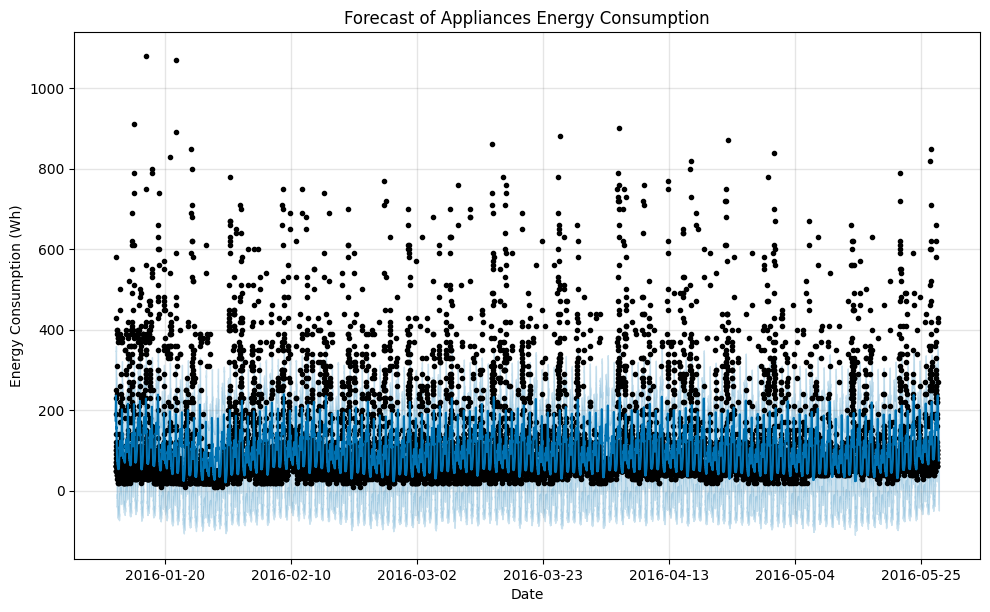

In [81]:
# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecast of Appliances Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

In [82]:
# Evaluate the model
y_test = series['y'][-30:]
forecasted_values = forecast['yhat'][-30:]

mae = mean_absolute_error(y_test, forecasted_values)
mse = mean_squared_error(y_test, forecasted_values)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 73.07649439872002
Mean Squared Error (MSE): 12565.833712276006
Root Mean Squared Error (RMSE): 112.09742955249244
